# MatPlotLib

In [ ]:
import pyqtgraph.examples
pyqtgraph.examples.run()

- Method: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tricontourf.html
- Examples:
   - https://matplotlib.org/gallery/images_contours_and_fields/irregulardatagrid.html
   - https://matplotlib.org/gallery/images_contours_and_fields/trigradient_demo.html#sphx-glr-gallery-images-contours-and-fields-trigradient-demo-py
- Colormaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [114]:
import sys
import numpy as np
#np.random.seed(19680801)
npts = 100000
pixel_num = 300
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

<IPython.core.display.Javascript object>


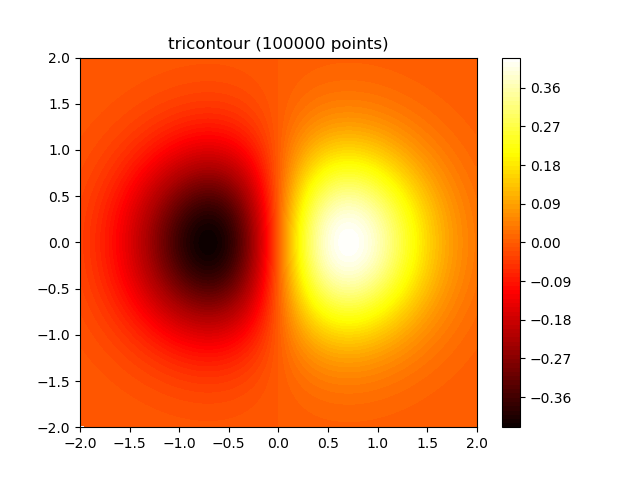

Setup: 25.000 ms, Tricontourf: 1786.003 ms, Finish: 135.000 ms


In [115]:
%matplotlib notebook

#import matplotlib
# Agg backend in order to open an extra window that can be filled by a background thread
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import time

time_start = time.time()
fig, (ax) = plt.subplots(nrows=1)


# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

time_setup = time.time()
#ax.tricontour(x, y, z, levels=100, linewidths=0, colors='k')
cntr = ax.tricontourf(x, y, z, levels=100, cmap='hot')

time_tricolourf = time.time()

fig.colorbar(cntr, ax=ax)
#ax.plot(x, y, 'ko', ms=3)
ax.axis((min(x), max(x), min(y), max(x)))
ax.set_title('tricontour (%d points)' % npts)

plt.show()
time_finish = time.time()
print('Setup: {0:.3f} ms, Tricontourf: {1:.3f} ms, Finish: {2:.3f} ms'.format((time_setup-time_start)*1e3, 
                                                                     (time_tricolourf-time_setup)*1e3, 
                                                                     (time_finish-time_tricolourf)*1e3))

<IPython.core.display.Javascript object>


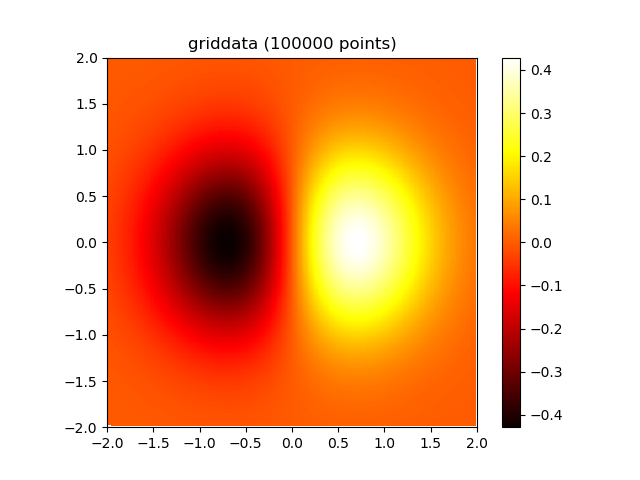

Mesh: 140.000 ms, Grid: 1858.006 ms, Plot: 90.000 ms


In [116]:
%matplotlib notebook

#import matplotlib
# Agg backend in order to open an extra window that can be filled by a background thread
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time

fig, (ax) = plt.subplots(nrows=1)

time_start = time.time()

x_lines = np.linspace(min(x), max(x), pixel_num)
y_lines = np.linspace(min(y), max(y), pixel_num)

x_grid, y_grid = np.meshgrid(x_lines,y_lines)

time_mesh = time.time()
points = np.array([x, y]).T

grid_z1 = griddata(points, z, (x_grid, y_grid), method='linear')

time_grid = time.time()
image = ax.imshow(grid_z1, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='hot')

fig.colorbar(image, ax=ax)
ax.set_title('griddata (%d points)' % npts)

plt.show()

time_finish = time.time()
print('Mesh: {0:.3f} ms, Grid: {1:.3f} ms, Plot: {2:.3f} ms'.format((time_mesh-time_start)*1e3, 
                                                                     (time_grid-time_mesh)*1e3, 
                                                                     (time_finish-time_grid)*1e3))

<IPython.core.display.Javascript object>


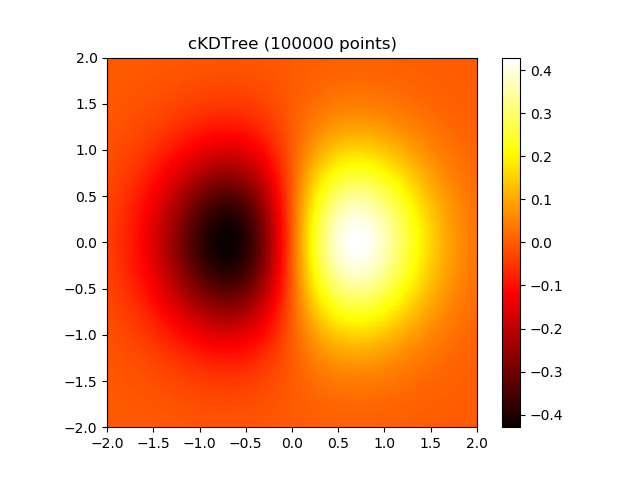

Mesh: 112.000 ms, Grid: 525.001 ms, Plot: 135.000 ms


In [119]:
%matplotlib notebook

#import matplotlib
# Agg backend in order to open an extra window that can be filled by a background thread
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import time


import numpy as np
from scipy.spatial import cKDTree as KDTree
    # http://docs.scipy.org/doc/scipy/reference/spatial.html
    #https://stackoverflow.com/questions/3104781/inverse-distance-weighted-idw-interpolation-with-python

class Invdisttree:

    def __init__( self, X, z, leafsize=10, stat=0 ):
        assert len(X) == len(z), "len(X) %d != len(z) %d" % (len(X), len(z))
        self.tree = KDTree( X, leafsize=leafsize )  # build the tree
        self.z = z

    def __call__( self, q, nnear=6, eps=0):
            # nnear nearest neighbours of each query point --
        q = np.asarray(q)
        self.distances, self.ix = self.tree.query( q, k=nnear, eps=eps )
        if nnear > 1:
            w = 1.0 / self.distances**2
            return np.sum(w * self.z.flatten()[self.ix], axis=1) / np.sum(w, axis=1)
        else:
            return self.z.flatten()[self.ix]


Nnear = 3
leafsize = 16
eps = .1  # approximate nearest, dist <= (1 + eps) * true nearest

np.set_printoptions( 3, threshold=100, suppress=True )  # .3f

time_start = time.time()
known = np.array([x, y]).T

x_lines = np.linspace(min(x), max(x), pixel_num)
y_lines = np.linspace(min(y), max(y), pixel_num)

x_grid, y_grid = np.meshgrid(x_lines,y_lines)

grid = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

fig, (ax) = plt.subplots(nrows=1)
time_setup = time.time()

#...............................................................................
invdisttree = Invdisttree( known, z, leafsize=leafsize)
interpol = invdisttree(grid , nnear=Nnear, eps=eps)

time_grid = time.time()

interpol = np.reshape(interpol,(len(x_lines), len(y_lines)))
image = ax.imshow(interpol, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='hot')

fig.colorbar(image, ax=ax)
ax.set_title('cKDTree (%d points)' % npts)

plt.show()

time_finish = time.time()

print('Mesh: {0:.3f} ms, Grid: {1:.3f} ms, Plot: {2:.3f} ms'.format((time_setup-time_start)*1e3, 
                                                                    (time_grid-time_setup)*1e3, 
                                                                    (time_finish-time_grid)*1e3))

In [ ]:

        interpol = np.zeros( (len(self.distances),) + np.shape(self.z[0]) )
        jinterpol = 0
        for dist, ix in zip( self.distances, self.ix ):
            if nnear == 1:
                wz = self.z[ix]
            elif dist[0] < 1e-10:
                wz = self.z[ix[0]]
            else:  # weight z s by 1/dist --
                w = 1 / dist**p
                if weights is not None:
                    w *= weights[ix]  # >= 0
                w /= np.sum(w)
                wz = np.dot( w, self.z[ix] )
                if self.stat:
                    self.wn += 1
                    self.wsum += w
            interpol[jinterpol] = wz
            jinterpol += 1
        return interpol if qdim > 1  else interpol[0]

# pyqtgraph-qo

In [ ]:
%gui qt
import pyqtgraph as pg

In [ ]:
import numpy as np
import pyqtgraph as pg

# Set white background and black foreground
pg.setConfigOption('background', 'w')
pg.setConfigOption('foreground', 'k')

# Generate random points
n = len(x)
print('Number of points: ' + str(n))
data = np.array([x,y])

# Create the main application instance
app = pg.mkQApp()

# Create the view
view = pg.PlotWidget()
view.resize(800, 600)
view.setWindowTitle('Scatter plot using pyqtgraph with PyQT5')
view.setAspectLocked(True)
view.show()

# Create the scatter plot and add it to the view
scatter = pg.ScatterPlotItem(pen=pg.mkPen(None), size=10, brush=pg.mkBrush(255, 0, 0, 20))

view.addItem(scatter)

# Convert data array into a list of dictionaries with the x,y-coordinates
#pos = [{'pos': data[:, i]} for i in range(n)]
pos = [{'pos': data[:, i], 'data': z[i], 'brush':pg.intColor(i, n)} for i in range(n)]

now = pg.ptime.time()
scatter.setData(pos)

print("Plot time: {} sec".format(pg.ptime.time() - now))

# Gracefully exit the application
sys.exit(app.exec_())

In [ ]:

import numpy as np
import pyqtgraph as pg
import pyqtgraph.ptime as ptime

from matplotlib import cm

# Get the colormap
colormap = cm.get_cmap("hot")  # cm.get_cmap("CMRmap")
colormap._init()
lut = (colormap._lut * 255).view(np.ndarray)  # Convert matplotlib colormap from 0-1 to 0 -255 for Qt

# Set white background and black foreground
pg.setConfigOption('background', 'w')
pg.setConfigOption('foreground', 'k')

# Generate random points
n = len(x)
print('Number of points: ' + str(n))
data = np.array([x,y,z])

# Create the main application instance
app = pg.mkQApp()

# Create the view
view = pg.PlotWidget()
view.resize(800, 600)
view.setWindowTitle('ImageItem')
view.setAspectLocked(True)
view.show()

## Create image item
img = pg.ImageItem(border='w')
view.addItem(img)

img.setLookupTable(lut)

## Set initial view bounds
#view.setRange(QtCore.QRectF(0, 0, 600, 600))

## Create random image
#data = np.random.normal(size=(600, 600), loc=1024, scale=64).astype(np.uint16)
print(data)

now = pg.ptime.time()
img.setImage(data)

print("Plot time: {} sec".format(pg.ptime.time() - now))

# Gracefully exit the application
sys.exit(app.exec_())